In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [4]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [5]:
#encode target variable
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 0, 'at risk': 1, 'degraded': 2})

In [6]:
X = data[['water_quality', 'biodiversity_index', 'air_quality_index', 'soil_ph', 'vegetation_cover']]
y = data['ecosystem_health']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [12]:
#classification report
print(classification_report(y_test, y_pred, target_names=['Healthy', 'At Risk', 'Degraded']))

              precision    recall  f1-score   support

     Healthy       0.86      0.29      0.43        21
     At Risk       0.90      0.63      0.74       222
    Degraded       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



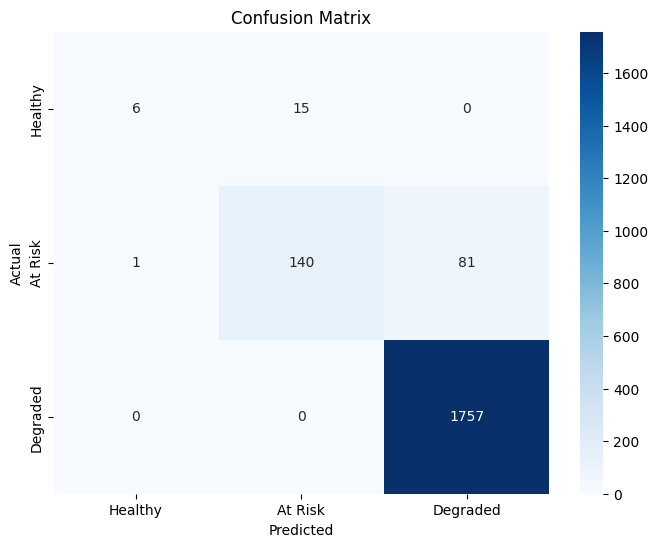

In [13]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'At Risk', 'Degraded'], 
            yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
import joblib
joblib.dump(model, "Ecosystem_Health_Model.pkl")

['Ecosystem_Health_Model.pkl']

In [15]:
eco_health = joblib.load('Ecosystem_Health_Model.pkl')

In [16]:
X.columns

Index(['water_quality', 'biodiversity_index', 'air_quality_index', 'soil_ph',
       'vegetation_cover'],
      dtype='object')

In [17]:
data.describe()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.415956,151.358963,0.500050,49.871338,6.232751,1.864200
std,28.763013,86.788365,0.286774,28.899459,1.591063,0.375729
min,0.001163,0.047323,0.000048,0.000554,3.500092,0.000000
25%,24.632887,76.183740,0.253748,24.685725,4.843497,2.000000
50%,49.252862,151.769033,0.502068,50.003024,6.215445,2.000000
75%,74.000635,226.943766,0.744674,74.711625,7.627624,2.000000
max,99.971767,299.977448,0.999901,99.978937,8.999847,2.000000


In [20]:
wq = float(input("Enter water quality index: "))
aqi = float(input("Enter air quality index: "))
biodiversity = float(input("Enter biodiversity index: "))
veg_cover = float(input("Enter vegetation cover index: "))
soil_ph = float(input("Enter soil pH index: "))
# Predict the ecosystem health based on user input
user_input = np.array([[wq, aqi, biodiversity, veg_cover, soil_ph]])
predicted_health = eco_health.predict(user_input)
print("Predicted Ecosystem Health:")
if predicted_health == 1:
    print("Healthy")
elif predicted_health == 0:
    print("At Risk")
elif predicted_health == 2:
    print("Degraded")

Predicted Ecosystem Health:
Degraded


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X,y)
y.value_counts()

ecosystem_health
2    8761
0    8761
1    1120
Name: count, dtype: int64